In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
start = time.perf_counter()

# Parametry fizyczne
hbar = 1.0
m = 1.0

# Siatka przestrzenna
N = 2**13
x_max = 8.0
x = np.linspace(-20, 20, N)
dx = x[1] - x[0]

# Operator Laplace’a (druga pochodna)
diag = -2.0 * np.ones(N)
off_diag = 1.0 * np.ones(N - 1)
T = (np.diag(diag) + np.diag(off_diag, +1) + np.diag(off_diag, -1)) / dx**2

# Potencjał studni kwadratowej
x_1 = -4
x_2 = 3

V = np.full(N, 0)  # bardzo duża wartość domyślnie
mask1 = x < x_1
mask2 = (x >= x_1) & (x <= x_2)
mask3 = x > x_2

V[mask1] = 70*(1 - np.exp(4+x[mask1]))
V[mask2] = -120 + 10*x[mask2]+10*x[mask2]**2
V[mask3] = 70*(1 - np.exp(3-x[mask3]))

V_matrix = np.diag(V)

# Hamiltonian
H = -(hbar**2 / (2 * m)) * T + V_matrix

# Rozwiązanie zagadnienia własnego
energies, wavefuncs = np.linalg.eigh(H)

end = time.perf_counter()
print(f"Czas działania: {end - start:.6f} sekundy")

Czas działania: 73.882548 sekundy


Najniższe energie własne:
E_0 = -119.807591
E_1 = -115.298075
E_2 = -110.834605
E_3 = -106.349470
E_4 = -101.887371
E_5 = -97.416641
E_6 = -92.941584
E_7 = -88.472705
E_8 = -83.988488
E_9 = -79.527858
E_10 = -75.046546
E_11 = -70.589924
E_12 = -66.101679
E_13 = -61.642310
E_14 = -57.157805
E_15 = -52.698185
E_16 = -48.209614
E_17 = -43.757217
E_18 = -39.270813
E_19 = -34.815135
E_20 = -30.333502
E_21 = -25.872572
E_22 = -21.393023
E_23 = -16.930152
E_24 = -12.462116
E_25 = -8.000174
E_26 = -3.549803
E_27 = 0.882016
E_28 = 5.274792
E_29 = 9.624061
E_30 = 13.891262
E_31 = 18.096881
E_32 = 22.203260
E_33 = 26.228510
E_34 = 30.115314
E_35 = 33.869384
E_36 = 37.438773
E_37 = 40.891467
E_38 = 44.179549
E_39 = 47.302542
E_40 = 50.214985
E_41 = 52.974069
E_42 = 55.535672
E_43 = 57.893282
E_44 = 60.042731
E_45 = 62.006352
E_46 = 63.730431
E_47 = 65.252561
E_48 = 66.542355
E_49 = 67.609781
E_50 = 68.442603
E_51 = 68.987783
E_52 = 69.030926


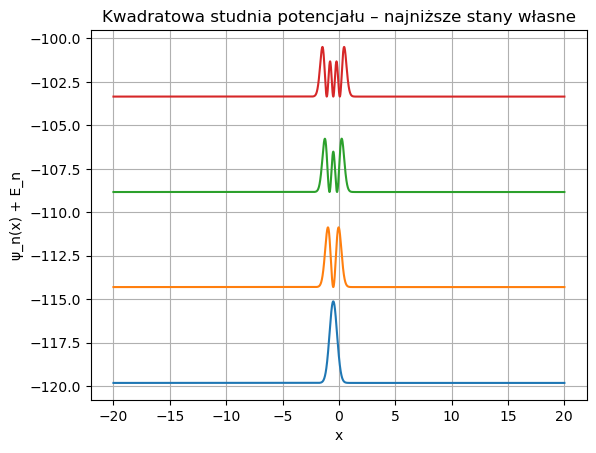

In [2]:
# Najniższe energie
print("Najniższe energie własne:")
for i in range(53):
    print(f"E_{i} = {energies[i]:.6f}")

# Normalizuję i rysuję funkcje falowe
for i in range(0, 4):
    plt.plot(x, 800*np.abs(wavefuncs[:, i])**2 + energies[i] + i)       # ψ_n przesunięta w pionie
plt.title("Kwadratowa studnia potencjału – najniższe stany własne")
plt.xlabel("x")
plt.ylabel("ψ_n(x) + E_n")
plt.grid()
plt.show()


In [3]:
np.save("energie własne E dla gładkiej studni 1D FD.npy", energies)

In [34]:
len(wavefuncs[:, 0:53])

np.float64(0.004883408619217988)

In [33]:
wavefuncs[:, 0:2][:,0]

array([1.77506473e-25, 3.97677180e-25, 1.90389708e-25, ...,
       3.83310395e-25, 4.41214934e-25, 2.71783598e-25], shape=(8192,))

In [44]:
np.save("funkcje psi(E) dla studni gładkiej skończonej 1D FD.npy", wavefuncs[:, 0:53])

In [4]:
len(energies)

8192

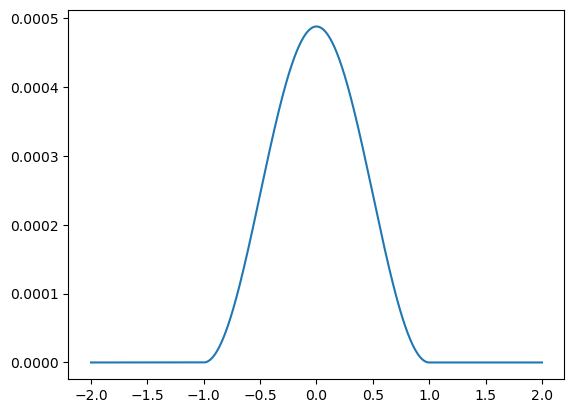

In [19]:
plt.plot(x, np.abs(wavefuncs[:, 0])**2)